## This is a example of how you will be doing projects in python.
### Use markdown cells -OR- comments in cells to place AT LEAST the question number you are working on. 

3.	Import the required packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [5]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

First 5 rows

In [7]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


Last 5 rows

In [9]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [11]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [13]:
gdp_df = gdp_df.drop(columns=['Value Footnotes'])

gdp_df = gdp_df.rename(columns={
    'Country or Area': 'Country',
    'Value': 'GDP_Per_Capita'
})

gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [104]:
max_years = gdp_df['Year'].nunique()
# print('Amount of years: ', max_years)

num_years_per_country = gdp_df.groupby('Country', observed=False)['Year'].nunique()
# print(num_years_per_country)

full_data_countries = num_years_per_country[num_years_per_country == max_years]
num_full = full_data_countries.shape[0]
# print(full_data_countries)

missing_data_countries = num_years_per_country[num_years_per_country != max_years]
# print(missing_data_countries)

observations_per_year = gdp_df['Year'].value_counts().sort_index(ascending=False)

print('\nNum of countries that have data for all years:\n', num_full)
print('\nList of countries that have a missing data:\n', missing_data_countries)
print("\nNumber of observations per year:\n", observations_per_year)


Num of countries that have data for all years:
 228

List of countries that have a missing data:
 Country
Afghanistan                  24
Bhutan                       33
Cayman Islands               18
CuraÃ§ao                     24
Djibouti                     11
Faroe Islands                16
Greenland                    32
Kosovo                       16
Lebanon                      33
Montenegro                   27
San Marino                   26
Serbia                       29
Sint Maarten (Dutch part)    15
Somalia                      33
Syrian Arab Republic         33
Tonga                        33
Turks and Caicos Islands     13
Virgin Islands               21
West Bank and Gaza           30
Name: Year, dtype: int64

Number of observations per year:
 Year
2023    240
2022    246
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2014    247
2013    247
2012    246
2011    246
2010    245
2009    245
2008    244
2007    242
2006    242
2005

**The year 1990 has the least data (233 observations), suggesting that older historical records might be incomplete.**

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

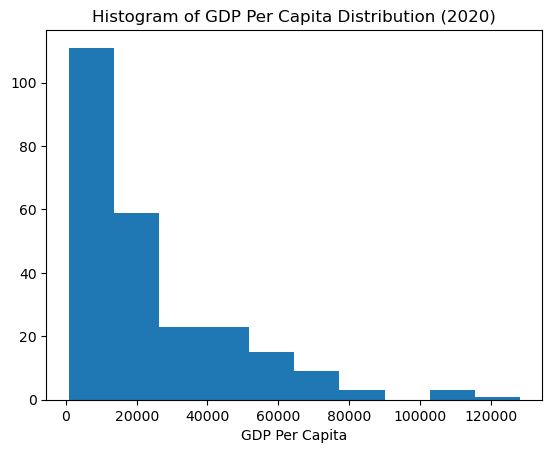


--------------------------------------------



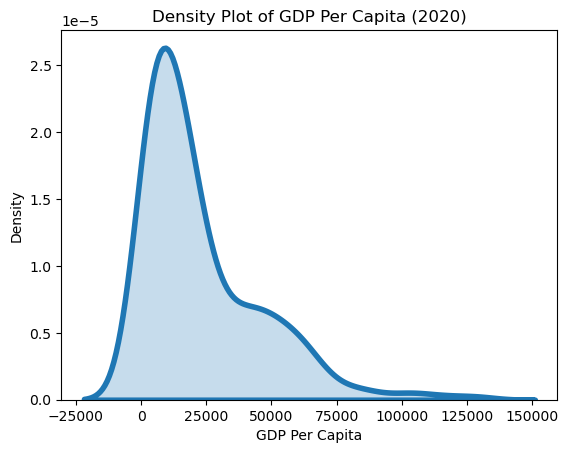


--------------------------------------------



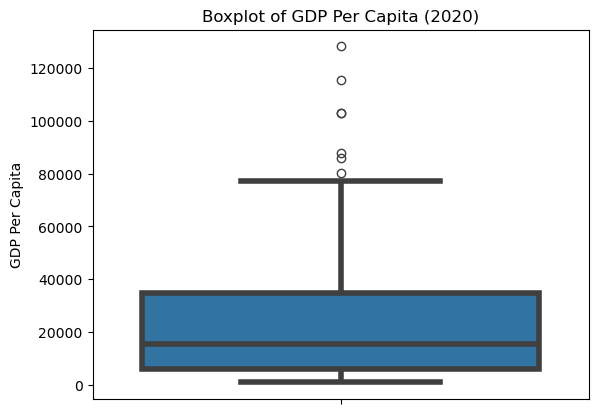


--------------------------------------------



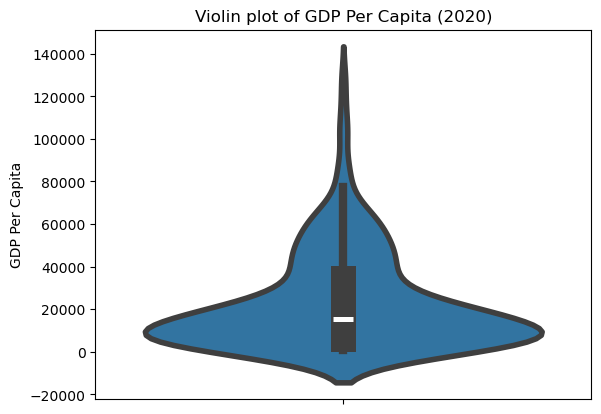

In [18]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
# print(gdp_2020)

plt.hist(gdp_2020['GDP_Per_Capita'])
plt.xlabel('GDP Per Capita')
plt.title('Histogram of GDP Per Capita Distribution (2020)')
plt.show()

print('\n--------------------------------------------\n')

sns.kdeplot(gdp_2020['GDP_Per_Capita'], fill=True, linewidth = 4)
plt.xlabel('GDP Per Capita')
plt.title('Density Plot of GDP Per Capita (2020)')
plt.show()

print('\n--------------------------------------------\n')

sns.boxplot(y='GDP_Per_Capita', data=gdp_2020, linewidth = 4)
plt.ylabel('GDP Per Capita')
plt.title('Boxplot of GDP Per Capita (2020)')
plt.show()

print('\n--------------------------------------------\n')

sns.violinplot(y=gdp_2020["GDP_Per_Capita"], linewidth = 4)
plt.ylabel('GDP Per Capita')
plt.title('Violin plot of GDP Per Capita (2020)')
plt.show()

9. What was the median GDP per capita value in 2020?

In [20]:
median_gdp_2020 = gdp_2020['GDP_Per_Capita'].median()
print('\nMedian GDP per capita in 2020: ', median_gdp_2020)


Median GDP per capita in 2020:  15309.23598817024


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

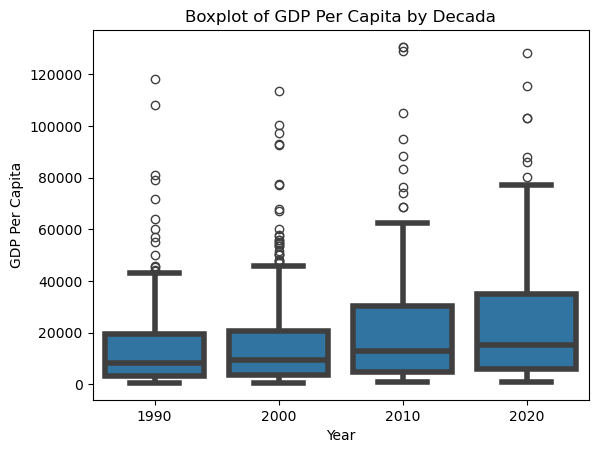


--------------------------------------------



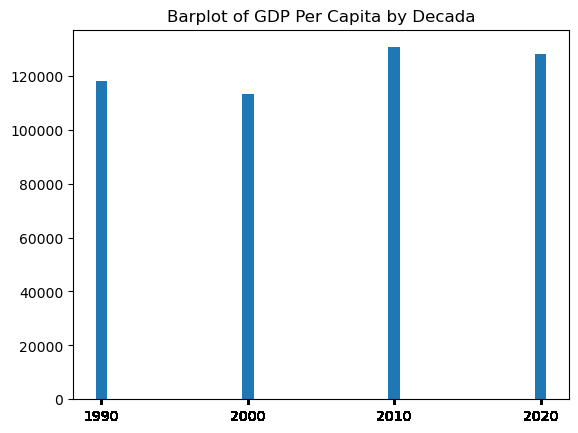


--------------------------------------------



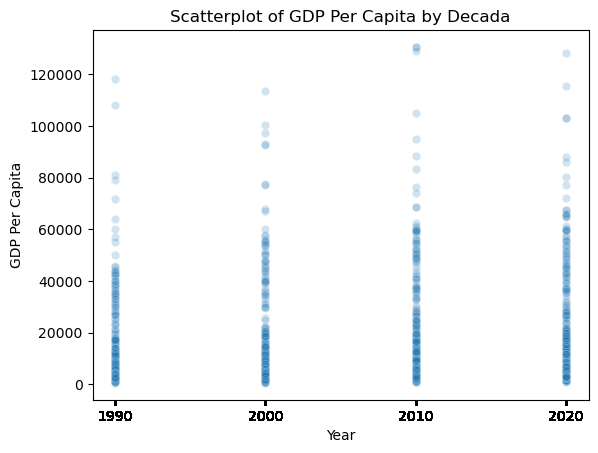


--------------------------------------------



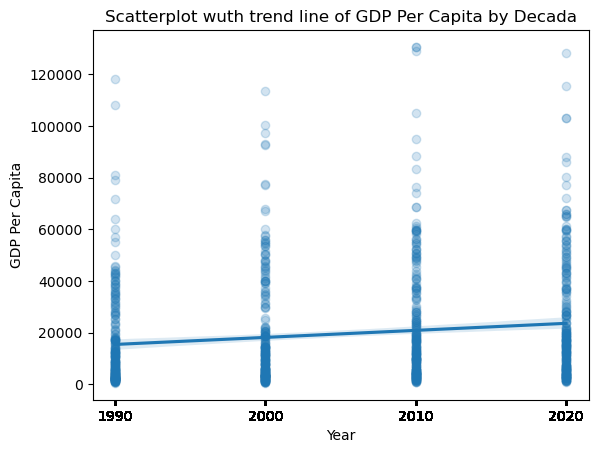

In [22]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
# print(gdp_decades)

sns.boxplot(x='Year', y='GDP_Per_Capita', data=gdp_decades, linewidth = 4)
plt.ylabel('GDP Per Capita')
plt.title('Boxplot of GDP Per Capita by Decada')
plt.show()

print('\n--------------------------------------------\n')

plt.bar(gdp_decades['Year'], gdp_decades['GDP_Per_Capita'])
plt.xticks(gdp_decades['Year'])
plt.title('Barplot of GDP Per Capita by Decada')
plt.show()

print('\n--------------------------------------------\n')

sns.scatterplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], alpha=0.2)
plt.ylabel('GDP Per Capita')
plt.xticks(gdp_decades['Year'])
plt.title('Scatterplot of GDP Per Capita by Decada')
plt.show()

print('\n--------------------------------------------\n')

sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], scatter_kws={"alpha": 0.2})
plt.ylabel('GDP Per Capita')
plt.xticks(gdp_decades['Year'])
plt.title('Scatterplot wuth trend line of GDP Per Capita by Decada')
plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000?

In [24]:
first_high_gdp = gdp_df[gdp_df['GDP_Per_Capita'] > 100000].sort_values(by='Year').head(1)
print(f'\nCountry was the first to have a GDP per capita greater than $100,000: {first_high_gdp['Country'].values[0]} in {first_high_gdp['Year'].values[0]}')


Country was the first to have a GDP per capita greater than $100,000: United Arab Emirates in 1990


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.


Country with highest GDP per Capita in 2020:  Luxembourg

--------------------------------------------



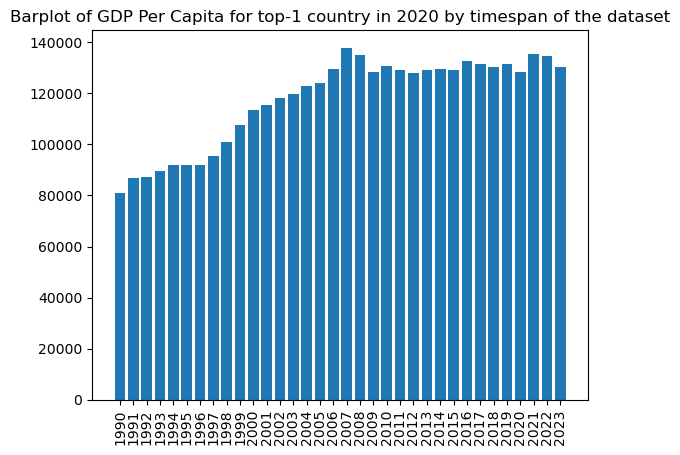

In [26]:
max_gdp_2020 = gdp_df[gdp_df['Year'] == 2020]['GDP_Per_Capita'].max()
# print('\nHighest GDP per Capita in 2020: ', max_gdp_2020)

max_country_2020 = gdp_df[(gdp_df['Year'] == 2020) & (gdp_df['GDP_Per_Capita'] == max_gdp_2020)]['Country'].values[0]
print('\nCountry with highest GDP per Capita in 2020: ', max_country_2020)

gdp_per_top_2020 = gdp_df[gdp_df['Country'] == max_country_2020]
# print('\nInfo about country with top GDP in 2020 by timespan of the dataset: \n', gdp_per_top_2020)

print('\n--------------------------------------------\n')

plt.bar(gdp_per_top_2020['Year'], gdp_per_top_2020['GDP_Per_Capita'])
plt.xticks(gdp_per_top_2020['Year'])
plt.xticks(rotation=90)
plt.title('Barplot of GDP Per Capita for top-1 country in 2020 by timespan of the dataset')
plt.show()

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?


Country with lowest GDP per Capita in 2020:  Burundi

--------------------------------------------



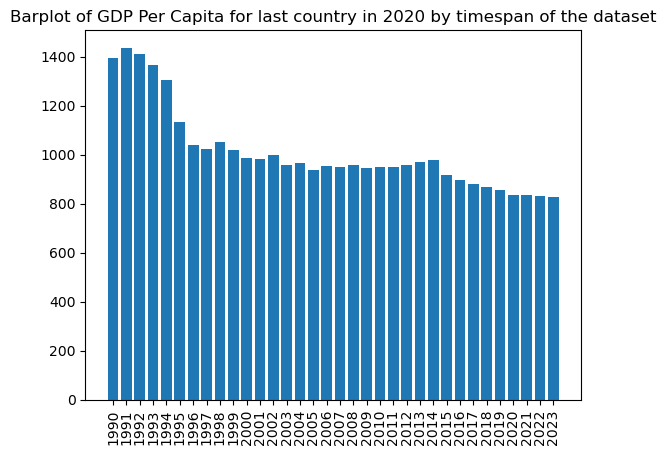

In [28]:
min_gdp_2020 = gdp_df[gdp_df['Year'] == 2020]['GDP_Per_Capita'].min()
# print('\nLowest GDP per Capita in 2020: ', min_gdp_2020)

min_country_2020 = gdp_df[(gdp_df['Year'] == 2020) & (gdp_df['GDP_Per_Capita'] == min_gdp_2020)]['Country'].values[0]
print('\nCountry with lowest GDP per Capita in 2020: ', min_country_2020)

gdp_per_last_2020 = gdp_df[gdp_df['Country'] == min_country_2020]
# print('\nInfo about country with lowest GDP in 2020 by timespan of the dataset: \n', gdp_per_last_2020)

print('\n--------------------------------------------\n')

plt.bar(gdp_per_last_2020['Year'], gdp_per_last_2020['GDP_Per_Capita'])
plt.xticks(gdp_per_last_2020['Year'])
plt.xticks(rotation=90)
plt.title('Barplot of GDP Per Capita for last country in 2020 by timespan of the dataset')
plt.show()

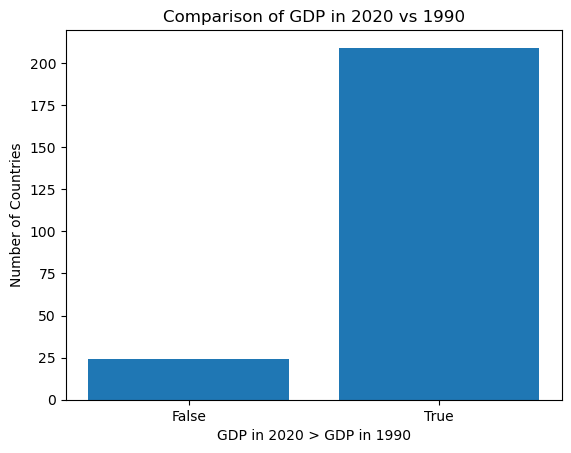


--------------------------------------------

                                      Country  2020_>_1990
10                                      Aruba        False
16                                   Barbados        False
27                                     Brunei        False
30                                    Burundi        False
37                   Central African Republic        False
44                                      Congo        False
49                            Dem. Rep. Congo        False
71   Fragile and conflict affected situations        False
73                                      Gabon        False
84                                      Haiti        False
111                           Kyrgyz Republic        False
121                                   Liberia        False
122                                     Libya        False
129                                Madagascar        False
144                                   Moldova        False
150      

In [29]:
gdp_1990_and_2020 = gdp_df[(gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2020)]
countries_both_years = gdp_1990_and_2020.groupby('Country', observed=False)['Year'].nunique()
countries_with_both_years = countries_both_years[countries_both_years == 2].index

gdp_1990_and_2020 = gdp_1990_and_2020[gdp_1990_and_2020['Country'].isin(countries_with_both_years)]
# print(gdp_1990_and_2020)

gdp_1990 = gdp_1990_and_2020[gdp_1990_and_2020['Year'] == 1990]
gdp_2020 = gdp_1990_and_2020[gdp_1990_and_2020['Year'] == 2020]

gdp_comparison = pd.merge(gdp_1990, gdp_2020, on='Country', suffixes=('_1990', '_2020'))
gdp_comparison['2020_>_1990'] = gdp_comparison['GDP_Per_Capita_2020'] > gdp_comparison['GDP_Per_Capita_1990']
# print(gdp_comparison[['Country', '2020_>_1990']])

comparison_counts = gdp_comparison['2020_>_1990'].value_counts()
plt.bar(comparison_counts.index, comparison_counts.values)
plt.xticks([0, 1], ['False', 'True'])
plt.xlabel('GDP in 2020 > GDP in 1990')
plt.ylabel('Number of Countries')
plt.title('Comparison of GDP in 2020 vs 1990')
plt.show()

print('\n--------------------------------------------\n')

print(gdp_comparison[gdp_comparison['2020_>_1990'] == False][['Country', '2020_>_1990']])

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [31]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows =6083)

First 5 rows

In [33]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


Last 5 rows

In [35]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [37]:
internet_df = internet_df.drop(columns=['Value Footnotes'])
internet_df = internet_df.rename(columns={
    'Country or Area': 'Country',
    'Value': 'Internet_Users_Pct'
})
internet_df.tail()

,Country,Year,Internet_Users_Pct
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739
6082,Zimbabwe,1990,0.000000


16. Look at the number of observations in this dataset per year. What do you notice?


In [39]:
observations_per_year = internet_df['Year'].value_counts().sort_index(ascending=False)

print("\nNumber of observations per year:\n", observations_per_year)


Number of observations per year:
 Year
2023     11
2022    184
2021    186
2020    186
2019    185
2018    174
2017    205
2016    206
2015    203
2014    204
2013    203
2012    209
2011    214
2010    209
2009    214
2008    214
2007    217
2006    212
2005    212
2004    210
2003    208
2002    214
2001    212
2000    210
1999    207
1998    195
1997    188
1996    177
1995    141
1994     92
1993     66
1992     50
1991     39
1990    226
Name: count, dtype: int64


17. What is the first year to have a non-zero internet users percentage value?


In [41]:
first_non_zero_users = internet_df[internet_df['Internet_Users_Pct'] > 0].sort_values(by='Year').head(1)
print(f'\nThe first year to have a non-zero internet users percentage value: {first_non_zero_users['Internet_Users_Pct'].values[0]} in {first_non_zero_users['Year'].values[0]} in {first_non_zero_users['Country'].values[0]}')


The first year to have a non-zero internet users percentage value: 0.0972773 in 1990 in Denmark


18. How does the distribution of internet users percent differ for 2000 and 2014?


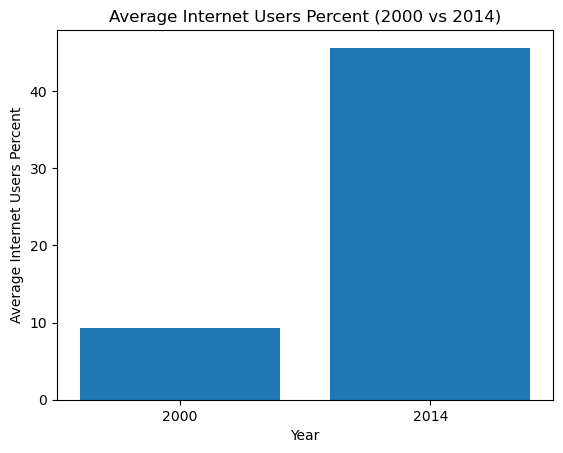

In [43]:
dist_internet_2000_vs_2014 = internet_df[(internet_df['Year'] == 2000) | (internet_df['Year'] == 2014)]

avg_internet_usage = dist_internet_2000_vs_2014.groupby('Year', observed=False)['Internet_Users_Pct'].mean()

plt.bar(avg_internet_usage.index.astype(str), avg_internet_usage.values)
plt.xlabel('Year')
plt.ylabel('Average Internet Users Percent')
plt.title('Average Internet Users Percent (2000 vs 2014)')
plt.show()

19. For how many countries was the percentage of internet users below 5% in 2014?


In [45]:
# print(internet_df[(internet_df['Internet_Users_Pct'] < 5) & (internet_df['Year'] == 2014)])

count_rows = len(internet_df[(internet_df['Internet_Users_Pct'] < 5) & (internet_df['Year'] == 2014)])
print("\nNumber of countries with the percentage of internet users below 5% in 2014: ", count_rows)



Number of countries with the percentage of internet users below 5% in 2014:  10


20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [47]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how='outer')

First 5 row

In [49]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2000,1617.826475,NaN
2,Afghanistan,2001,1454.110782,0.004723
3,Afghanistan,2002,1774.308743,0.004561
4,Afghanistan,2003,1815.928200,0.087891


Last 5 rows

In [51]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9494,Zimbabwe,2019,3294.806084,26.5883
9495,Zimbabwe,2020,2987.269823,29.2986
9496,Zimbabwe,2021,3184.785451,32.4616
9497,Zimbabwe,2022,3323.121932,32.5615
9498,Zimbabwe,2023,3442.251327,NaN


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

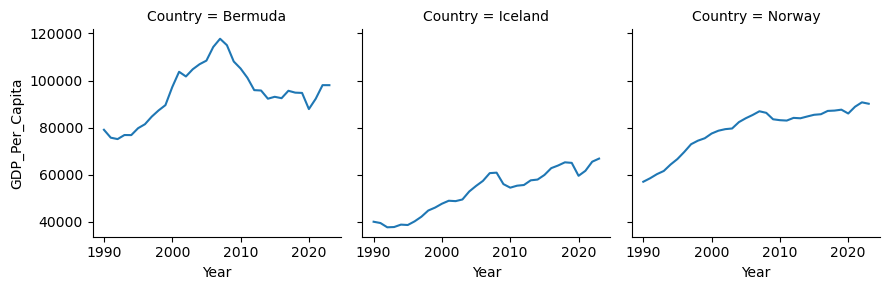

In [53]:
top3_internet_2014 = gdp_and_internet_use[
        (gdp_and_internet_use['Year'] == 2014) & (gdp_and_internet_use['GDP_Per_Capita'].notna())
    ].sort_values(by='Internet_Users_Pct', ascending=False).head(3)
# print(top3_internet_2014)

full_data_for_top3_2014 = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top3_internet_2014['Country'])]
# print(full_data_for_top3_2014)

g = sns.FacetGrid(full_data_for_top3_2014, col="Country")
g.map_dataframe(sns.lineplot, 'Year', 'GDP_Per_Capita')

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [55]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
print(gdp_and_internet_use_2014)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
15                    Afghanistan  2014     3017.942544              7.0000
49    Africa Eastern and Southern  2014     4052.851526                 NaN
83     Africa Western and Central  2014     4816.917355                 NaN
117                       Albania  2014    12788.747231             54.3000
151                       Algeria  2014    15073.762940             29.5000
...                           ...   ...             ...                 ...
9361           West Bank and Gaza  2014     5990.426615                 NaN
9395                        World  2014    17307.606891                 NaN
9424                        Yemen  2014             NaN             22.5500
9455                       Zambia  2014     3585.577485              6.5000
9489                     Zimbabwe  2014     3360.552173             16.3647

[285 rows x 4 columns]


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

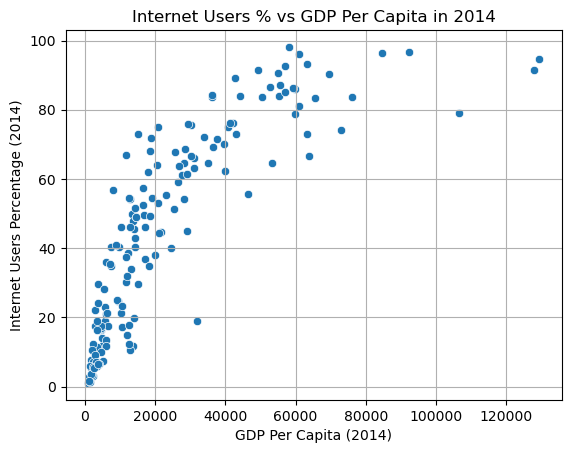

In [57]:
sns.scatterplot(data=gdp_and_internet_use_2014, x='GDP_Per_Capita', y='Internet_Users_Pct');

plt.xlabel('GDP Per Capita (2014)')
plt.ylabel('Internet Users Percentage (2014)')
plt.title('Internet Users % vs GDP Per Capita in 2014')
plt.grid(True)
plt.show()

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [106]:
gdp_and_internet_use_2014.loc[:, 'GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], 3, labels=["Low", "Medium", "High"])
print(gdp_and_internet_use_2014[['Country', 'GDP_Per_Capita', 'GDP_group']])

                          Country  GDP_Per_Capita GDP_group
15                    Afghanistan     3017.942544       Low
49    Africa Eastern and Southern     4052.851526       Low
83     Africa Western and Central     4816.917355       Low
117                       Albania    12788.747231    Medium
151                       Algeria    15073.762940    Medium
...                           ...             ...       ...
9361           West Bank and Gaza     5990.426615       Low
9395                        World    17307.606891    Medium
9424                        Yemen             NaN       NaN
9455                       Zambia     3585.577485       Low
9489                     Zimbabwe     3360.552173       Low

[285 rows x 3 columns]


25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

GDP_group
Low       11.6000
Medium    44.5945
High      75.9800
Name: Internet_Users_Pct, dtype: float64

--------------------------------------------



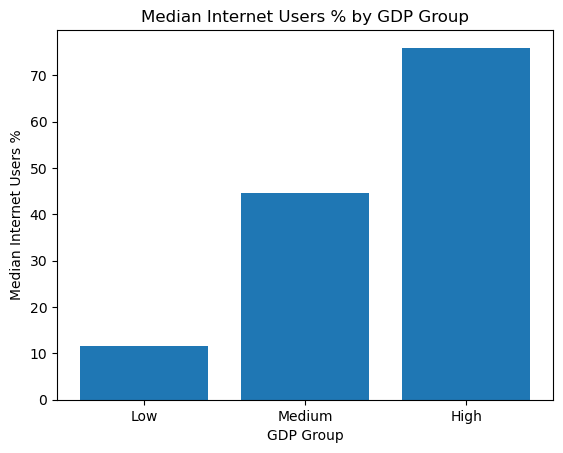

In [108]:
median_internet_by_gdp_group = gdp_and_internet_use_2014.groupby('GDP_group', observed=False)['Internet_Users_Pct'].median()
print(median_internet_by_gdp_group)

print('\n--------------------------------------------\n')

plt.bar(median_internet_by_gdp_group.index, median_internet_by_gdp_group.values)
plt.title('Median Internet Users % by GDP Group')
plt.xlabel('GDP Group')
plt.ylabel('Median Internet Users %')
plt.show()

### Bonus exercise:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.